In [1]:
import numpy as np
import matplotlib.pyplot as plt

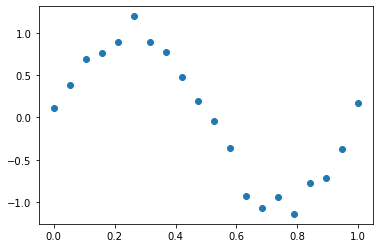

In [2]:
data_size = 20
x = np.linspace(0, 1, data_size)
noise = np.random.uniform(low=-1.0, high=1.0, size=data_size) * 0.2
y = np.sin(2.0 * np.pi * x) + noise

plt.scatter(x, y)

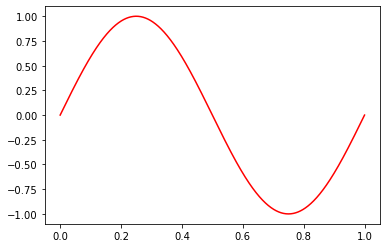

In [3]:
x_line = np.linspace(0, 1, 1000)
sin_x = np.sin(2.0 * np.pi * x_line)
plt.plot(x_line, sin_x, c='red')

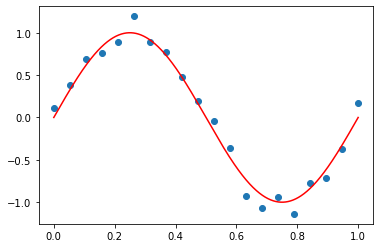

In [6]:
def plot_sin():
    plt.scatter(x, y)
    plt.plot(x_line, sin_x, c='red')
plot_sin()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x.shape

(20,)

In [39]:
lin_reg = LinearRegression().fit(x.reshape(-1, 1), y)

In [40]:
lin_reg.intercept_ , lin_reg.coef_

(0.86008668280999, array([-1.70097896]))

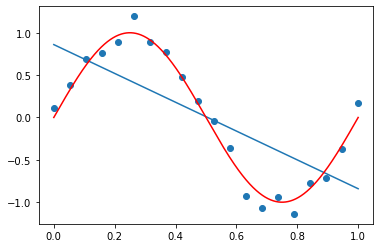

In [41]:
# 一時関数
plt.plot(x_line, lin_reg.intercept_ + lin_reg.coef_ * x_line)
plot_sin()

In [42]:
# 2次関数
x_2 = x ** 2 

In [43]:
x_new = np.concatenate([x.reshape(-1,1), x_2.reshape(-1,1)], axis=1)

In [44]:
x_new

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [45]:
lin_reg_2 = LinearRegression().fit(x_new, y)

In [46]:
lin_reg_2.intercept_, lin_reg_2.coef_

(0.9010113702316228, array([-1.96016865,  0.25918969]))

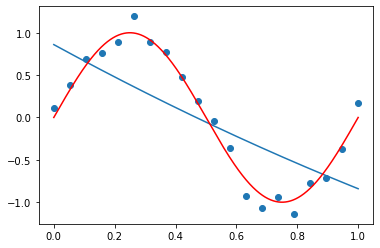

In [47]:
plt.plot(x_line, lin_reg.intercept_ + lin_reg_2.coef_[0] * x_line + lin_reg_2.coef_[1] * x_line ** 2)
plot_sin()

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
# 3次関数
poly = PolynomialFeatures(degree=3)
poly.fit(x.reshape(-1,1))
x_poly_3 = poly.transform(x.reshape(-1,1))

In [59]:
x_poly_3 # 各列は0,1,2,3次という意味

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

In [60]:
lin_reg_3 = LinearRegression().fit(x_poly_3, y)

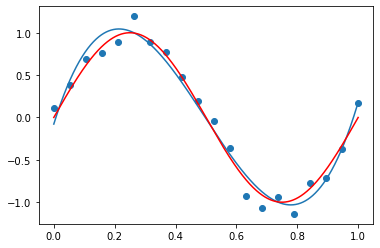

In [61]:
x_line_poly_3 = poly.fit_transform(x_line.reshape(-1, 1))
plt.plot(x_line, lin_reg_3.predict(x_line_poly_3))
plot_sin()

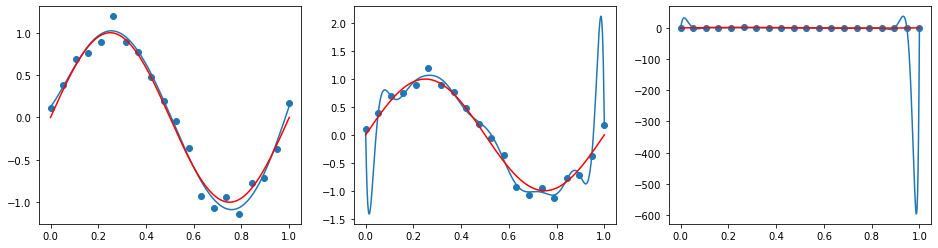

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for degree, ax in zip([5, 15, 25], axes):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    lin_reg = LinearRegression().fit(x_poly, y)
    x_line_poly = poly.fit_transform(x_line.reshape(-1,1))
    ax.plot(x_line, lin_reg.predict(x_line_poly))
    ax.scatter(x, y)
    ax.plot(x_line, sin_x, c='red')

## リッジ回帰、ラッソ回帰

In [65]:
import mglearn 
import pandas as pd
from sklearn.model_selection import train_test_split

In [66]:
x, y = mglearn.datasets.load_extended_boston()

In [69]:
x.shape

(506, 104)

In [70]:
y.shape

(506,)

In [71]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

In [72]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.026936,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.026936,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180


In [73]:
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [75]:
lin_reg = LinearRegression().fit(x_train, y_train)

In [76]:
print(round(lin_reg.score(x_train, y_train), 3))
print(round(lin_reg.score(x_test, y_test), 3))

0.952
0.607


In [78]:
from sklearn.linear_model import Ridge, Lasso

In [79]:
ridge = Ridge().fit(x_train, y_train)

In [80]:
def print_score(model):
    print(round(model.score(x_train, y_train), 3))
    print(round(model.score(x_test, y_test), 3))

In [82]:
print_score(ridge)

0.886
0.753


In [85]:
# alphaの値を変えてみる、デフォルトは１
ridge_10 = Ridge(alpha=10).fit(x_train, y_train)
print_score(ridge_10)

0.788
0.636


In [86]:
ridge_01 = Ridge(alpha=0.1).fit(x_train, y_train)
print_score(ridge_01)

0.928
0.772


In [87]:
coefficients = pd.DataFrame({'lin_reg': lin_reg.coef_, 'ridge': ridge.coef_, 'ridge_10': ridge_10.coef_, 'ridge_01': ridge_01.coef_})

In [88]:
coefficients

,lin_reg,ridge,ridge_10,ridge_01
0,-412.710947,-1.413684,-0.811610,-2.333007
1,-52.243207,-1.556619,0.647609,-5.441929
2,-131.898815,-1.465434,-0.809783,-6.128655
3,-12.004136,-0.126616,0.311335,-0.778525
4,-15.510713,-0.079119,-0.684624,1.291530
...,...,...,...,...
99,35.361714,-2.361124,-1.769550,-0.559662
100,11.955343,0.043467,-2.036371,4.947479
101,0.677026,1.208860,1.079849,2.667765
102,2.734520,-6.325992,-3.952641,-6.907626


In [90]:
# ラッソ回帰
lasso = Lasso().fit(x_train, y_train)

In [91]:
print_score(lasso)

0.293
0.209


In [100]:
# alphaを変えてみる、デフォルトは１
lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(x_train, y_train)
print_score(lasso_001)

0.896
0.766


In [104]:
cofficients_lasso = pd.DataFrame({'lin_reg': lin_reg.coef_, 'lasso': lasso.coef_, 'lasso001': lasso_001.coef_})
cofficients_lasso

,lin_reg,lasso,lasso001
0,-412.710947,-0.0,-0.000000
1,-52.243207,0.0,-0.000000
2,-131.898815,-0.0,-0.000000
3,-12.004136,0.0,0.000000
4,-15.510713,-0.0,-0.000000
...,...,...,...
99,35.361714,-0.0,0.000000
100,11.955343,-0.0,-0.000000
101,0.677026,0.0,0.344041
102,2.734520,-0.0,-8.246456
